In [126]:
# importer les librairies nécessaires
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.color_palette("Dark2",as_cmap=True)
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import SGDClassifier


In [102]:
# créer la dataframe à partir du fichier .csv
Data_test= pd.read_csv('C:/Users/Fatma/Desktop/Dauphine/ML/aug_test.csv',low_memory=False)
Data_test=Data_test.assign(target=-1)
Data_train= pd.read_csv('C:/Users/Fatma/Desktop/Dauphine/ML//aug_train.csv',low_memory=False)
D=pd.concat([Data_test,Data_train])
D=Data_train.copy()

In [103]:
# Afficher quelques lignes de la dataframe pour explorer 
D.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Features


In [104]:
# Explorer les types de variables 
print('les types de variables  ')
D.info()


les types de variables  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2)

# 1. EDA (Analyse exploratrice, visualisation et préparation des données)



In [105]:
#Quelles variables contiennent des valeurs NaN? 
check_for_nan = D.isna().sum()
print('---------Data ---------')
print (check_for_nan)

---------Data ---------
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


# Visualizing Missing Data using Seaborn displot()

To visualise missing data we can compute the proportion of the missing data for each variable in the data and make stacked barplot. We can use Seaborn’s displot() function. Here we provide the data in long form using melt() to displot() function.

<Figure size 720x432 with 0 Axes>

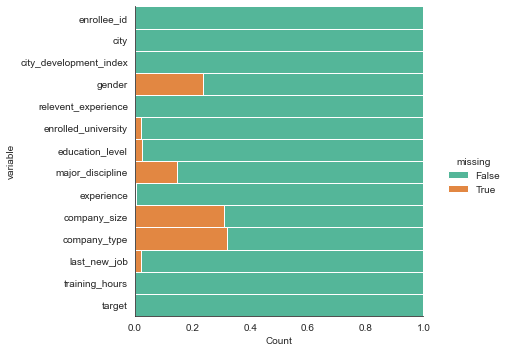

In [127]:
plt.figure(figsize=(10,6))
sns.displot(
    data=D.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette='Dark2'
)

On se propose d'examiner chacune des variables dans la dataframe, visualiser et faires les transformations nécessaires. 
Des questions surgissent entre temps, concernant les relations qui peuvent avoir lieu entre les variables...Essayer d'y répondre au fur et à mesure.


Première chose à faire c'est de diviser les variables en deux : variables numériques et variables catégoriques.

In [107]:
v_numérique=[]
v_catégorique=[]

In [108]:
# 1.Variable: enrollee_id
#Observer combien de valeurs uniques? cette variable représente quoi? conclusion: garder ou supprimer? 
a=D.shape[0]
b=D.enrollee_id.nunique(dropna=True)
print("On a ",a,"Lignes dans notre Dataframe et on a ",b,"lignes unique au niveau de la colone enrollee_id donc toutes les valeurs sont uniques.")


On a  19158 Lignes dans notre Dataframe et on a  19158 lignes unique au niveau de la colone enrollee_id donc toutes les valeurs sont uniques.


In [109]:
# 2.Variable: city
# Valeurs uniques, le type, comment transformer
b=D.city.nunique(dropna=True)
total_nan_values = D.city.isnull().sum().sum()
print("La variable City de type",D.city.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")

La variable City de type object a 123 valeurs uniques et 0 valeurs manquantes


C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


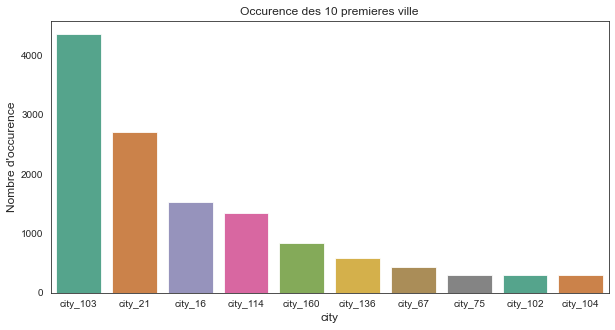

In [110]:
# Penser aussi à faire un plot pour observer l'occurence de chaque modalité
city_count  = D['city'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values , alpha=0.8,palette='Dark2')
plt.title('Occurence des 10 premieres ville')
plt.ylabel("Nombre d'occurence", fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [111]:
#remplacer "city_" avec " " et ensuite changer le type de city en float
D[D.columns[1]]=D[D.columns[1]].replace('[\ city_,]','',regex=True).astype(int)

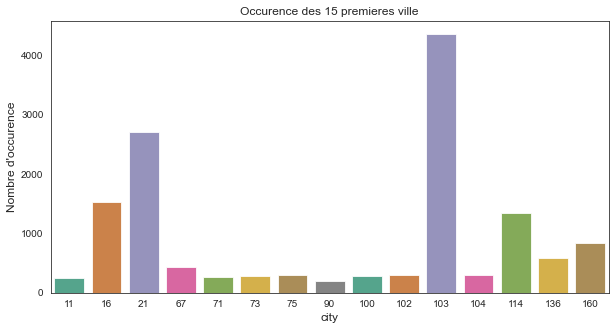

In [112]:
# Penser aussi à faire un plot pour observer l'occurence de chaque modalité
city_count  = D['city'].value_counts()
city_count = city_count[:15,]
plt.figure(figsize=(10,5))
sns.barplot(x=city_count.index, y=city_count.values, alpha=0.8,palette='Dark2')
plt.title('Occurence des 15 premieres ville')
plt.ylabel("Nombre d'occurence", fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

<AxesSubplot:ylabel='city'>

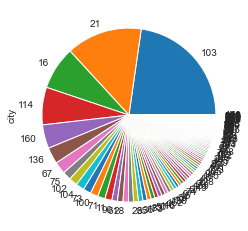

In [113]:
D['city'].value_counts().plot.pie()

Puisque la variable City est devenue numérique alors on peut l'integrer dans le tableau des variables numériques

In [114]:
v_numérique.append('city')

In [115]:
# 3.Variable: city_development_index
# Valeurs uniques, le type, comment transformer
b=D.city_development_index.nunique(dropna=True)
total_nan_values = D.city_development_index.isnull().sum().sum()
print("La variable city_development_index de type",D.city_development_index.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")


La variable city_development_index de type float64 a 93 valeurs uniques et 0 valeurs manquantes


<AxesSubplot:>

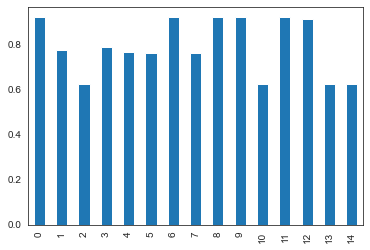

In [116]:
D['city_development_index'][:15].plot(kind='bar')

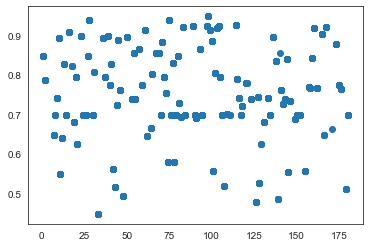

In [117]:
plt.scatter(D[D.columns[1]],D[D.columns[2]])

<AxesSubplot:xlabel='city', ylabel='city_development_index'>

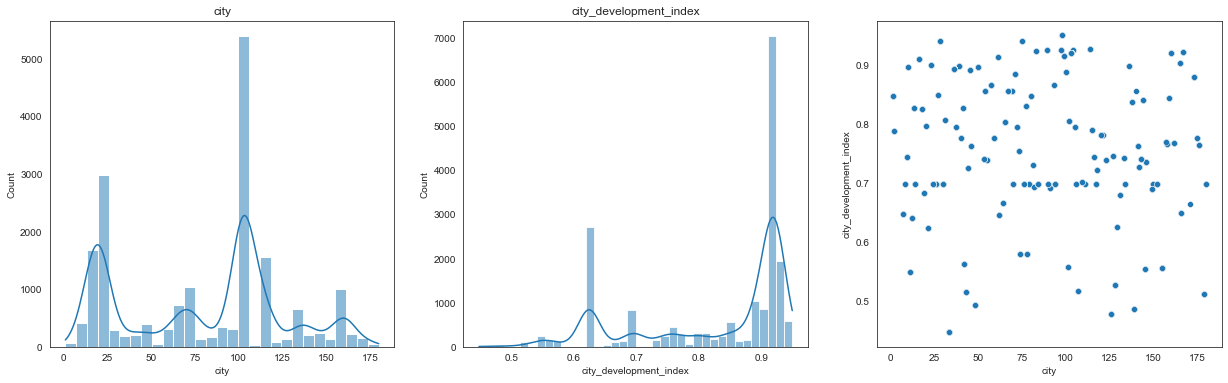

In [136]:
plt.figure(figsize=[21,6])
plt.subplot(1,3,1)
plt.title("city")
sns.histplot(data=D,x='city',kde=True)
plt.subplot(1,3,2)
plt.title('city_development_index')
sns.histplot(data=D,x='city_development_index',kde=True)
plt.subplot(1,3,3)
sns.scatterplot(x= D['city'], y=D['city_development_index'])

Sur le graphe on voit clairement que city et city_development_index ne sont pas liés linéairement.

In [118]:
# Question1: est ce que les variables city et city_development_index sont corrélés? 
coeff_pearson,_ = pearsonr(D[D.columns[1]],D[D.columns[2]])
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = 0.4106465124579544


In [119]:
r = np.corrcoef(D[D.columns[1]],D[D.columns[2]])
r

array([[1.        , 0.41064651],
       [0.41064651, 1.        ]])

D'aprés les deux résultats du coefficient de Pearson et marice de corrélation , on peut remarque que city et city_development_index sont faiblement corrélés.

In [120]:
v_numérique.append('city_development_index')

La variable gender de type object a 3 valeurs uniques et 4508 valeurs manquantes
Occurence de chaque valeurs :
 Male      90.245734
Female     8.450512
Other      1.303754
Name: gender, dtype: float64


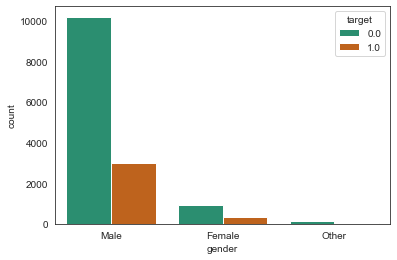

In [128]:
# 4.Variable: gender
# Valeurs uniques, le type, comment transformer? pourcentages de valeurs manquantes? les gérer ou laisser pour plus tard? 
b=D.gender.nunique(dropna=True)
total_nan_values = D.gender.isnull().sum().sum()
print("La variable gender de type",D.gender.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
Each_Gender_pourcentage = D['gender'].value_counts()/D['gender'].value_counts().sum()*100
print("Occurence de chaque valeurs :\n",Each_Gender_pourcentage)
g=sns.countplot(x='gender',hue='target',data=D,palette='Dark2')
v_catégorique.append('gender')


In [124]:
# 5.Variable: relevent_experience
# type, modalités, transformer
b=D.relevent_experience.nunique(dropna=True)
total_nan_values = D.relevent_experience.isnull().sum().sum()
print("La variable relevent_experience de type",D.relevent_experience.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['relevent_experience'].value_counts())

La variable relevent_experience de type object a 2 valeurs uniques et 0 valeurs manquantes
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


We have only two type in relevent experience so we're going to change them for numeric variable :

                            * Has relevent experience => 1
                            
                            * No relevent experience => 0

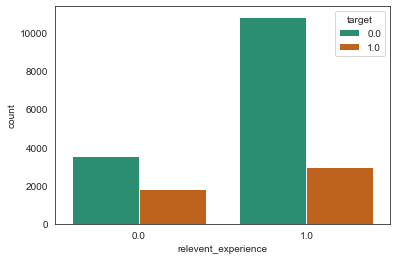

In [129]:
D['relevent_experience']=D['relevent_experience'].replace('Has relevent experience','1',regex=True)
D['relevent_experience']=D['relevent_experience'].replace('No relevent experience','0',regex=True)
D['relevent_experience']=D['relevent_experience'].astype(float)
v_numérique.append('relevent_experience')
g=sns.countplot(x='relevent_experience',hue='target',data=D,palette='Dark2')

In [24]:
# 6.Variable: enrolled_university 
# type, modalités, transformer, valeurs manquantes 
b=D.enrolled_university.nunique(dropna=True)
total_nan_values = D.enrolled_university.isnull().sum().sum()
print("La variable enrolled_university de type",D.enrolled_university.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['enrolled_university'].value_counts())

La variable enrolled_university de type object a 3 valeurs uniques et 386 valeurs manquantes
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64


La variable enrolled_university de type object a 3 valeurs uniques et 4508 valeurs manquantes
no_enrollment       73.604304
Full time course    20.013850
Part time course     6.381845
Name: enrolled_university, dtype: float64


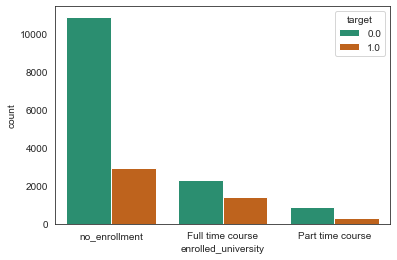

In [130]:
Each_enrolled_university_pourcentage = D['enrolled_university'].value_counts()/D['enrolled_university'].value_counts().sum()*100
print(Each_enrolled_university_pourcentage)
g=sns.countplot(x='enrolled_university',hue='target',data=D,palette='Dark2')


In [26]:
D['enrolled_university']=D['enrolled_university'].replace('no_enrollment',0,regex=True)
D['enrolled_university']=D['enrolled_university'].replace('Full time course',1,regex=True)
D['enrolled_university']=D['enrolled_university'].replace('Part time course',0.5,regex=True)
D['enrolled_university'] = D['enrolled_university'].apply(pd.to_numeric) 
v_numérique.append('enrolled_university')

In [27]:
# 7.Variable: education_level 
b=D.education_level.nunique(dropna=True)
total_nan_values = D.education_level.isnull().sum().sum()
print("La variable enrolled_university de type",D.education_level.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['education_level'].value_counts())

La variable enrolled_university de type object a 5 valeurs uniques et 460 valeurs manquantes
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


La variable enrolled_university de type object a 3 valeurs uniques et 460 valeurs manquantes
Graduate          62.028024
Masters           23.323350
High School       10.787250
Phd                2.214141
Primary School     1.647235
Name: education_level, dtype: float64


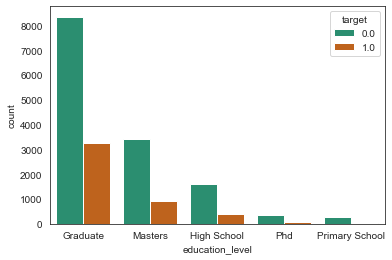

In [132]:
print("La variable enrolled_university de type",D.education_level.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
Each_education_level_pourcentage = D['education_level'].value_counts()/D['education_level'].value_counts().sum()*100
print(Each_education_level_pourcentage)
g=sns.countplot(x='education_level',hue='target',data=D,palette='Dark2')

In [29]:
D['education_level']=D['education_level'].replace('Primary School',0,regex=True)
D['education_level']=D['education_level'].replace('High School',1,regex=True)
D['education_level']=D['education_level'].replace('Graduate',2,regex=True)
D['education_level']=D['education_level'].replace('Masters',3,regex=True)
D['education_level']=D['education_level'].replace('Phd',4,regex=True)
v_numérique.append('education_level')

In [30]:
# 8.Variable: major_discipline
b=D.major_discipline.nunique(dropna=True)
total_nan_values = D.major_discipline.isnull().sum().sum()
print("La variable major_discipline de type",D.major_discipline.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['major_discipline'].value_counts())

La variable major_discipline de type object a 6 valeurs uniques et 2813 valeurs manquantes
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


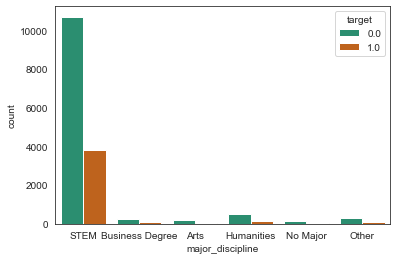

In [31]:
Each_major_discipline_pourcentage = D['major_discipline'].value_counts()/D['major_discipline'].value_counts().sum()*100
Each_major_discipline_pourcentage 
g=sns.countplot(x='major_discipline',hue='target',data=D,palette='Dark2')
v_catégorique.append('major_discipline')

In [32]:
# 9.Variable: experience
b=D.experience.nunique(dropna=True)
total_nan_values = D.experience.isnull().sum().sum()
print("La variable experience de type",D.experience.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['experience'].value_counts())

La variable experience de type object a 22 valeurs uniques et 65 valeurs manquantes
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


In [33]:
D['experience']=D['experience'].replace('>20','22',regex=True)
D['experience']=D['experience'].replace('<1','0',regex=True)

C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


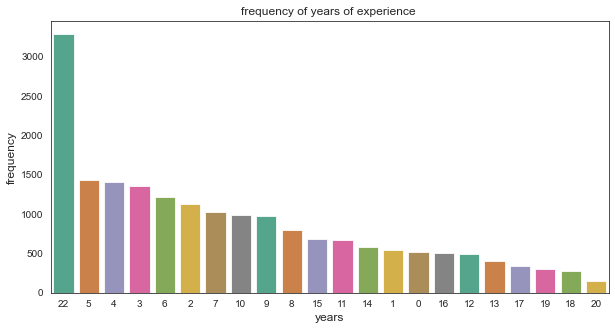

In [34]:
city_count  = D['experience'].value_counts()
city_count = city_count[:22]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8,palette='Dark2')
plt.title('frequency of years of experience ')
plt.ylabel("frequency", fontsize=12)
plt.xlabel('years', fontsize=12)
plt.show()

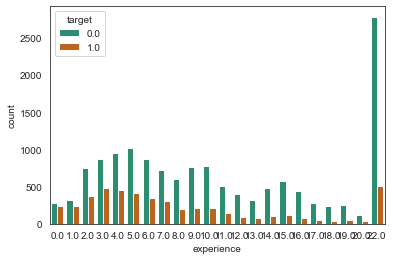

In [35]:
v_numérique.append('experience')
D['experience']=D['experience'].astype(float)
g=sns.countplot(x='experience',hue='target',data=D,palette='Dark2')

In [36]:
# 10.Variable: company_size  
b=D.company_size.nunique(dropna=True)
total_nan_values = D.company_size.isnull().sum().sum()
print("La variable company_size de type",D.company_size.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['company_size'].value_counts())

La variable company_size de type object a 8 valeurs uniques et 5938 valeurs manquantes
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


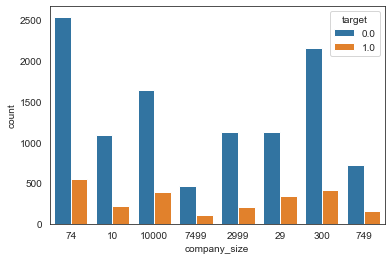

In [37]:
D['company_size']=D['company_size'].replace('[\+]','',regex=True)
D['company_size']=D['company_size'].replace('[\<]','',regex=True)
D['company_size'] = D['company_size'].fillna('')
for i in range(D['company_size'].shape[0]):
    if ('-' in D['company_size'].values[i]) :
        pos=D['company_size'].values[i].find('-')
        c1=D['company_size'].values[i][0:pos]
        c2=D['company_size'].values[i][pos+1:len(D['company_size'].values[i])]
        D['company_size'].values[i]=(int(c1)+int(c2))//2
    elif ('/' in D['company_size'].values[i]) :
        pos=D['company_size'].values[i].find('/')
        c1=D['company_size'].values[i][0:pos]
        c2=D['company_size'].values[i][pos+1:len(D['company_size'].values[i])]
        D['company_size'].values[i]=(int(c1)+int(c2))//2
D['company_size']=D['company_size'].replace('',np.nan,regex=True)
g=sns.countplot(x='company_size',hue='target',data=D)
D['company_size']=D['company_size'].astype(float)
v_numérique.append('company_size')

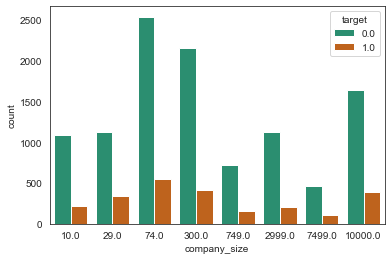

In [38]:
D['company_size']=D['company_size'].astype(float)
g=sns.countplot(x='company_size',hue='target',data=D,palette='Dark2')
v_numérique.append('company_size')

In [39]:
# 11.Variable: company_type
b=D.company_type.nunique(dropna=True)
total_nan_values = D.company_type.isnull().sum().sum()
print("La variable company_type de type",D.company_type.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
Each_company_type_pourcentage = D['company_type'].value_counts()/D['company_type'].value_counts().sum()*100
total_nan_values = D.company_type.isnull().sum().sum()/D['company_type'].value_counts().sum()*100
print(Each_company_type_pourcentage)
print("Il y a ",total_nan_values,"valeurs manquantes")


La variable company_type de type object a 6 valeurs uniques et 6140 valeurs manquantes
Pvt Ltd                75.410969
Funded Startup          7.689353
Public Sector           7.335996
Early Stage Startup     4.632048
NGO                     4.002151
Other                   0.929482
Name: company_type, dtype: float64
Il y a  47.16546320479336 valeurs manquantes


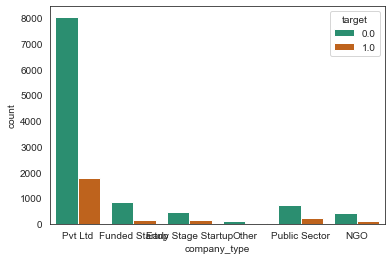

In [40]:
g=sns.countplot(x='company_type',hue='target',data=D,palette='Dark2')
v_catégorique.append('company_type')

In [41]:
# 12.Variable: last_new_job
b=D.last_new_job.nunique(dropna=True)
total_nan_values = D.last_new_job.isnull().sum().sum()
print("La variable experience de type",D.last_new_job.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['last_new_job'].value_counts())


La variable experience de type object a 6 valeurs uniques et 423 valeurs manquantes
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64


In [42]:
D['last_new_job']=D['last_new_job'].replace('never','0',regex=True)
D['last_new_job']=D['last_new_job'].replace('>4','5',regex=True)

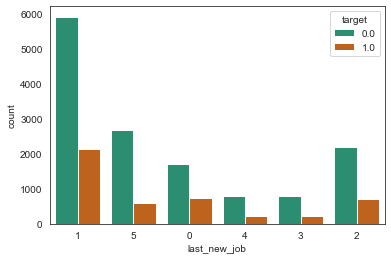

In [43]:
g=sns.countplot(x='last_new_job',hue='target',data=D,palette='Dark2')
D['last_new_job']=D['last_new_job'].astype(float)
v_numérique.append('last_new_job')

In [44]:
# 13.Variable: training_hours
b=D.training_hours.nunique(dropna=True)
total_nan_values = D.training_hours.isnull().sum().sum()
print("La variable experience de type",D.training_hours.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['training_hours'].value_counts())

v_numérique.append('training_hours')
D['training_hours']=D['training_hours'].astype(int)

La variable experience de type int64 a 241 valeurs uniques et 0 valeurs manquantes
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64


<AxesSubplot:>

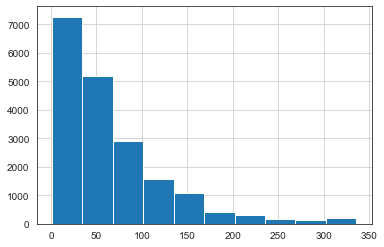

In [45]:
D['training_hours'].hist()

On a rien a changer au niveau de cette variable car elle est deja de type numérique et possede aucune valeur manquante

In [146]:
# 14. Variable: target 
#Examniner la variable target... quel type?  a-t-on une base de donnée équilibrée? 
b=D.target.nunique(dropna=True)
total_nan_values = D.target.isnull().sum().sum()
print("La variable target de type",D.target.dtype,"a",b,"valeurs uniques et",total_nan_values,"valeurs manquantes")
print(D['target'].value_counts())

import plotly.graph_objects as go
roomdf = D.groupby('target').size()/D['target'].count()*100
labels = roomdf.index
values = roomdf.values

fig = px.pie(D, values=values, names=labels,title="target")
fig.show()

La variable target de type float64 a 2 valeurs uniques et 0 valeurs manquantes
0.0    14381
1.0     4777
Name: target, dtype: int64


On remarque que 75.1% de la variable tagert prend 0 et 24.9% de la variable target prend 1 => La Data est désequilibrée (target prend 1 représente les fraudes : la classe minoritaire / target prend 0 : la classe majoritaire)

NB : Il ne faut pas utiliser l’accuracy car dans le cas du déséquilibre de classes, l’exactitude peut être trompeuse!

D’autres métriques sont plus pertinentes dans le cas du déséquilibre de classes.

   *La précision pour minimiser le taux d’erreurs parmi les exemples prédits positifs par le modèle
   
   *Le rappel pour tenter de détecter un maximum de positif
   
   *Le F1-score pour trouver un compromis entre la précision et le rappel. Lorsqu’il est aussi coûteux de manquer un positif que de déclarer un faux positif
   
==> On va donc utiliser la stratégie de rééchantillonnage et il existe deux méthodes principales qu'on peut utiliser pour égaliser les classes : Le sur-échantillonnage : Oversampling et le sous-échantillonnage :Undersampling 
         
         ===> On va utiliser le Oversampling

Questions diverses où l'on veut comprendre les relations entre différentes variables? 
Penser à faire des plots pour visualiser les réponses aux questions. 
hint: Je vous recommande de créer deux nouvelles colonnes "stay" et "change" qui remplacent la variable target. Ceci est plus commode pour les représentations graphiques qui utilisent le groupby 

In [47]:
# Parmi ceux qui décident de rester/quitter, combien y'en a de filles, combien de garçons? 
# Utiliser Groupby dans les questions doréanvant, Data.groupby("gender").agg("sum")[["stay", "change"]]
D.insert(13, "Stay", 0, allow_duplicates=False)
D.insert(14, "Change", 0, allow_duplicates=False)
D['Stay'] = np.where(D['target']>=1,1, 0)
D['Change'] = np.where(D['target']==0,1, 0)

# Corrélation entre les variables numériques


In [48]:
v_num=D[['city','city_development_index','relevent_experience','experience','company_size','last_new_job','training_hours']]
v_num.describe()

,city,city_development_index,relevent_experience,experience,company_size,last_new_job,training_hours
count,19158.000000,19158.000000,19158.000000,19093.000000,13220.000000,18735.000000,19158.000000
mean,80.128876,0.828848,0.719908,10.272246,2277.357262,2.000427,65.366896
std,46.413570,0.123362,0.449056,7.058512,3666.256474,1.675596,60.058462
min,1.000000,0.448000,0.000000,0.000000,10.000000,0.000000,1.000000
25%,21.000000,0.740000,0.000000,4.000000,74.000000,1.000000,23.000000
50%,101.000000,0.903000,1.000000,9.000000,300.000000,1.000000,47.000000
75%,104.000000,0.920000,1.000000,16.000000,2999.000000,3.000000,88.000000
max,180.000000,0.949000,1.000000,22.000000,10000.000000,5.000000,336.000000


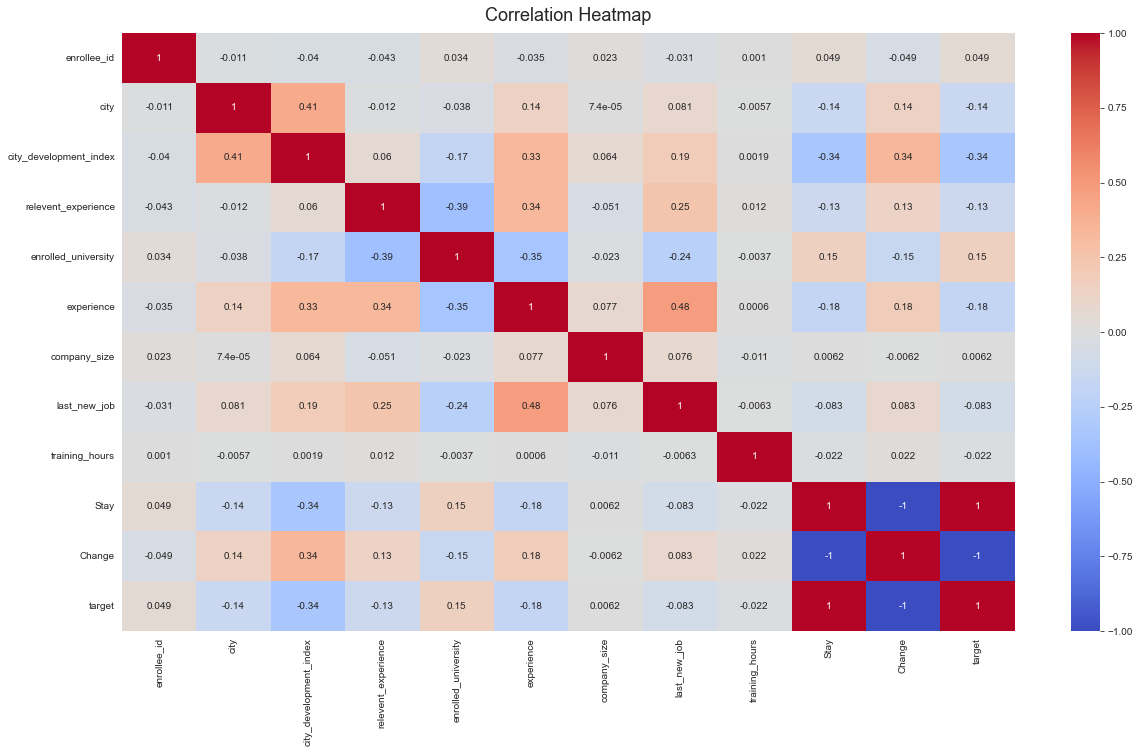

In [49]:
plt.figure(figsize=(20, 11))
heatmap=sns.heatmap(D.corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

D'aprés ce HeatMap on peut constater que :

*La variable "City" est corrélés avec la variable "City_Development_index" ,et faiblement corrélés avec les variables "experience" et "last_new_job".

*La variable "City_Development_index"est corrélés avec la variable "City","experience" et faiblement corrélés avec la variable"last_new_job".

*La variable "relevent_experience"est corrélés avec la variable "experience" et la variable"last_new_job".
*La variable "experience"est corrélés avec la variable "City_Development_index","relevent_experience" ,"last_new_job"et faiblement corrélés avec la variable"city".

*La variable"company_size" n'est corrélés avec aucune des variables donc on peut la supprimer.
, de meme pour la variable "training_hours".


C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

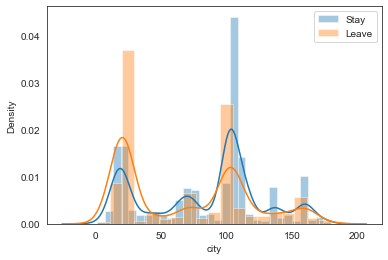

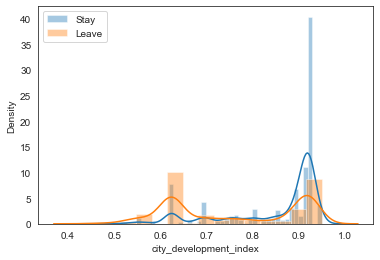

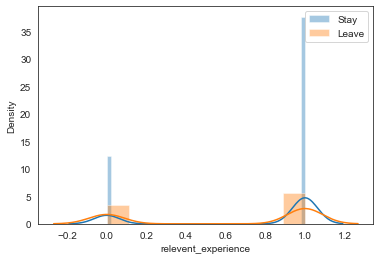

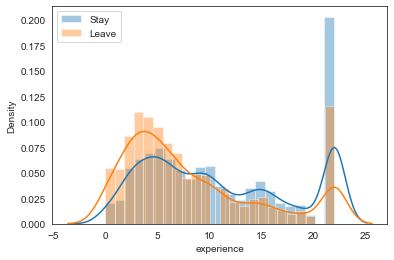

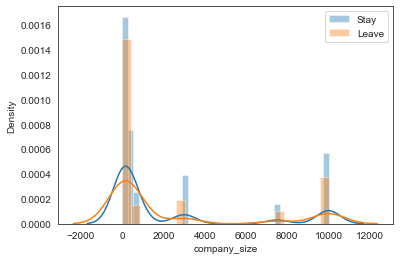

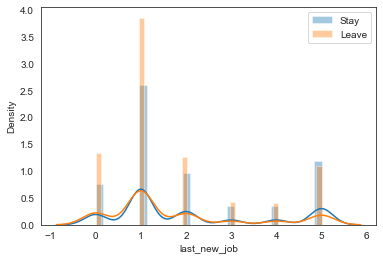

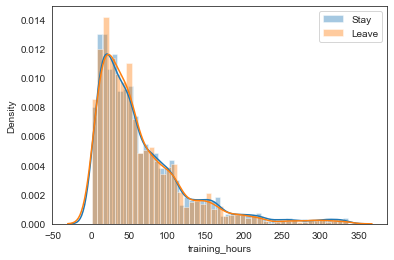

In [50]:
Stay=D[D["target"]==0]
Leave=D[D["target"]==1]
for col in v_num:
    plt.figure()
    sns.distplot(Stay[col],label="Stay")
    sns.distplot(Leave[col],label="Leave")
    plt.legend()

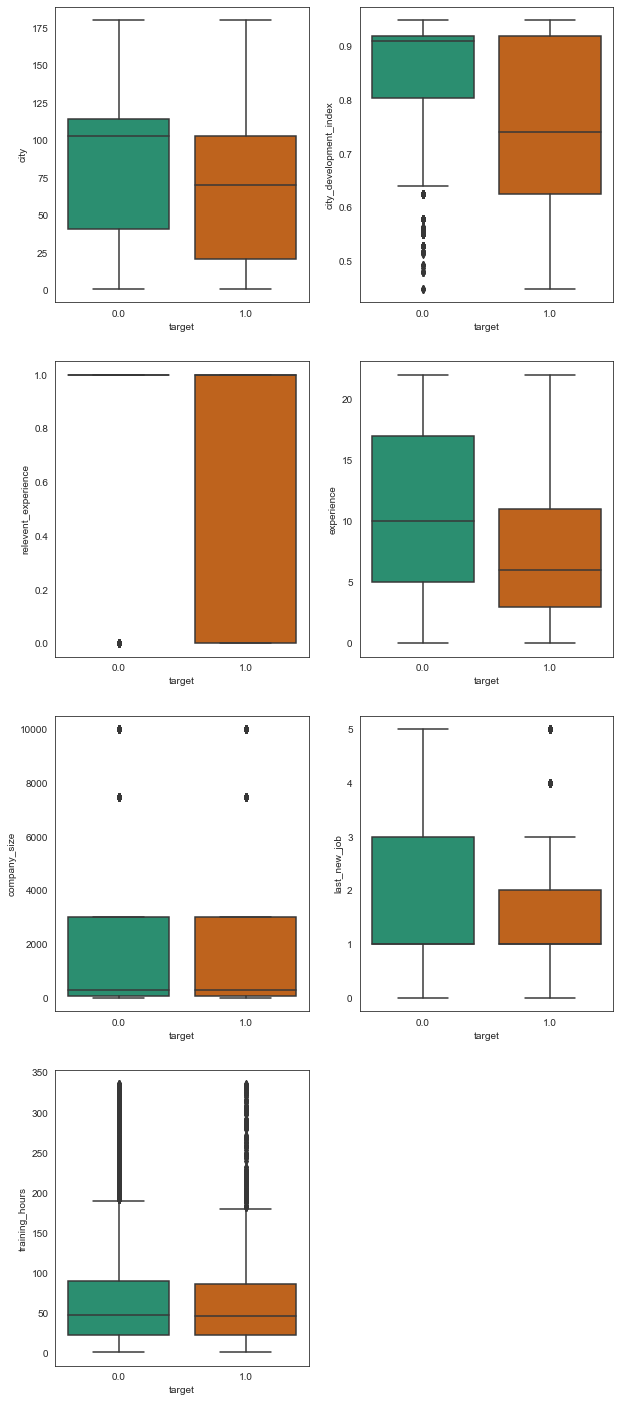

In [51]:
v=v_num.columns
fig=plt.figure(figsize=(10,25))
for i in range(len(v)):
    col=v[i]
    sub=fig.add_subplot(4,2,i+1)
    sns.boxplot(x='target', y=col ,data=D,palette='Dark2')

# les variables catégoriques


In [52]:
v_cat=D[['gender', 'enrolled_university', 'education_level', 'major_discipline','company_type']]

In [53]:
v_cat.describe()

,enrolled_university
count,18772.000000
mean,0.232048
std,0.402810
min,0.000000
25%,0.000000
50%,0.000000
75%,0.500000
max,1.000000


## les variables catégoriques VS Target


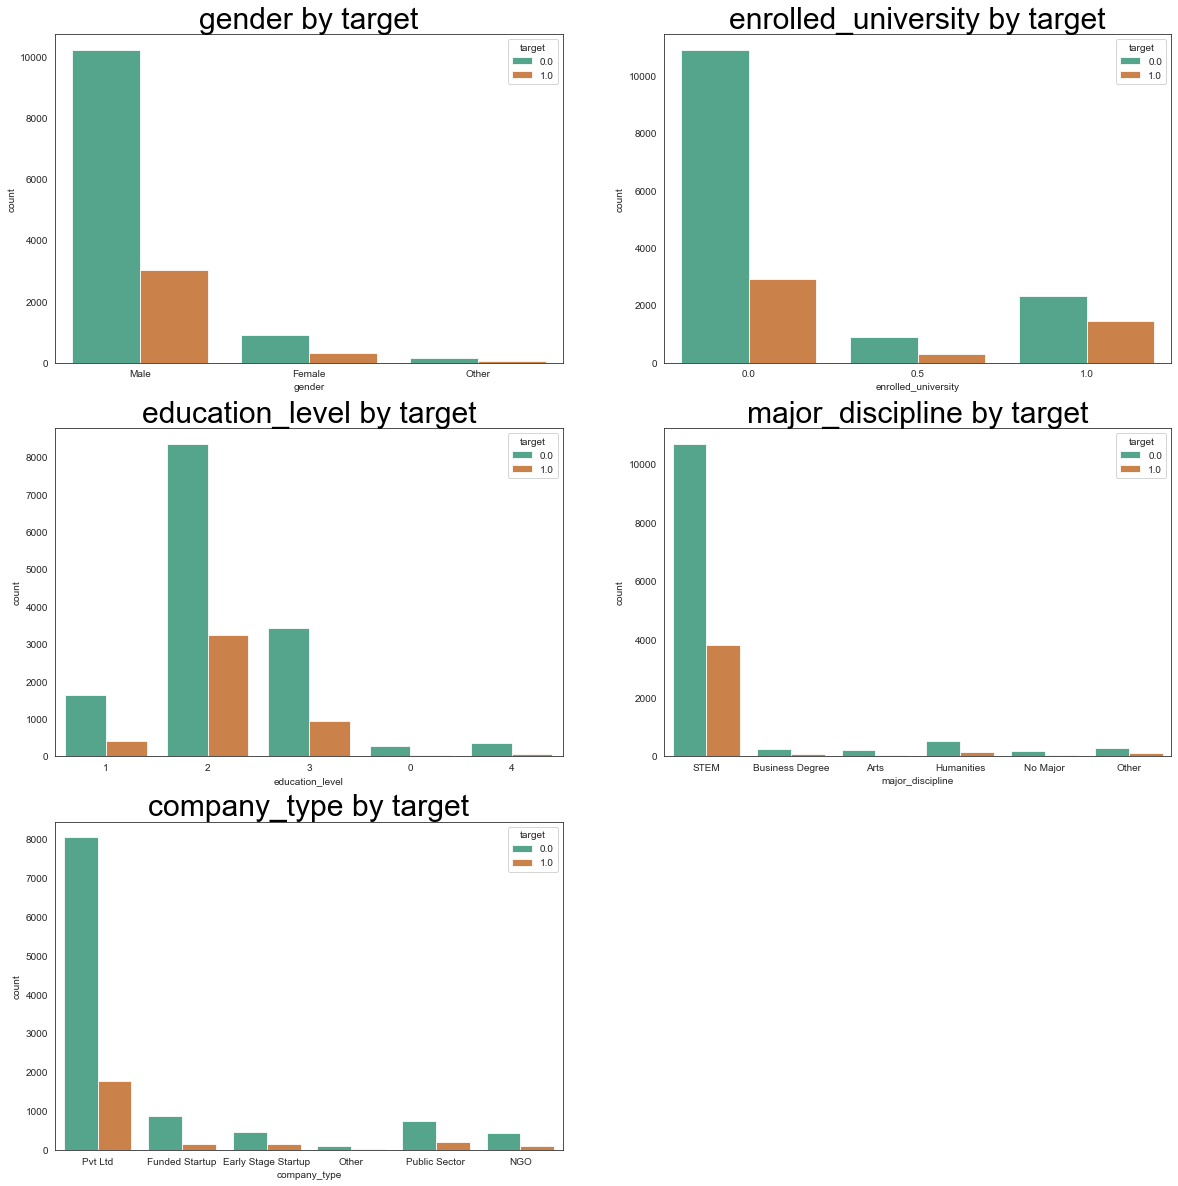

In [54]:
v=v_cat.columns
fig=plt.figure(figsize=(20,35))
n=1
for i in v:
    sub=fig.add_subplot(5,2,n)
    sns.countplot(x=i, hue='target', alpha=0.8, data=D,palette='Dark2')
    plt.title(i+" by target", fontsize='30',color='black')
    n+=1
plt.show()

# Visualisation , Data Missing and   Imputation

---Imputing refers to using a model to replace missing values.



enrollee_id' est une variable qui est unique, représente comme l'ID de chaque valeur donc on peut la supprimer car elle n'apporte rien de spécial a notre base.

In [55]:
del D['enrollee_id']

In [56]:
D

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Stay,Change,target
0,103,0.920,Male,1.0,0.0,2,STEM,22.0,NaN,NaN,1.0,36,1,0,1.0
1,40,0.776,Male,0.0,0.0,2,STEM,15.0,74.0,Pvt Ltd,5.0,47,0,1,0.0
2,21,0.624,NaN,0.0,1.0,2,STEM,5.0,NaN,NaN,0.0,83,0,1,0.0
3,115,0.789,NaN,0.0,NaN,2,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1,0,1.0
4,162,0.767,Male,1.0,0.0,3,STEM,22.0,74.0,Funded Startup,4.0,8,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,Male,0.0,0.0,2,Humanities,14.0,NaN,NaN,1.0,42,1,0,1.0
19154,103,0.920,Male,1.0,0.0,2,STEM,14.0,NaN,NaN,4.0,52,1,0,1.0
19155,103,0.920,Male,1.0,0.0,2,STEM,22.0,74.0,Pvt Ltd,4.0,44,0,1,0.0
19156,65,0.802,Male,1.0,0.0,1,NaN,0.0,749.0,Pvt Ltd,2.0,97,0,1,0.0


When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. so we can replace the missing walues with Male , because Male represents 90.22% of our Data and Female represents only 8.45%.
we're going to do the same for major_discipline and company_type.

-----------Enrolled University/relevent_experience/Education level----------

<AxesSubplot:xlabel='education_level'>

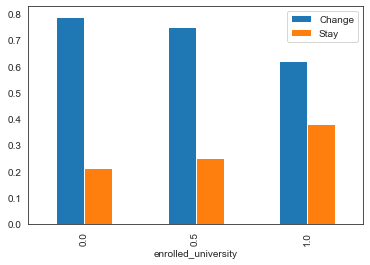

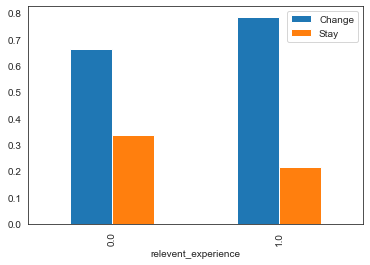

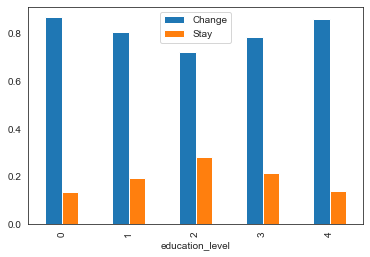

In [57]:
D.groupby("enrolled_university").agg("mean")[["Change","Stay"]].plot(kind='bar')
D.groupby("relevent_experience").agg("mean")[["Change","Stay"]].plot(kind='bar')
D.groupby("education_level").agg("mean")[["Change","Stay"]].plot(kind='bar')


In [58]:
KNN=pd.DataFrame()
from sklearn.impute import KNNImputer
KNN=pd.concat([KNN, D['enrolled_university']],axis=1)
KNN=pd.concat([KNN, D['relevent_experience']],axis=1)
KNN=pd.concat([KNN, D['education_level']],axis=1)
K=KNN.columns.values
imputer = KNNImputer(n_neighbors=4)
imputer.fit(KNN)
KNN=imputer.transform(KNN)
KNN=pd.DataFrame(KNN,columns=K)
D['enrolled_university']=KNN['enrolled_university']
D['relevent_experience']=KNN['relevent_experience']
D['education_level']=KNN['education_level']

<AxesSubplot:xlabel='company_type'>

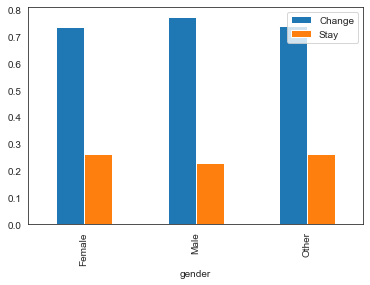

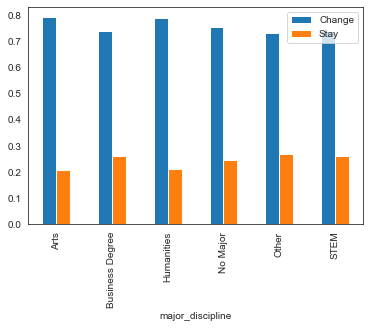

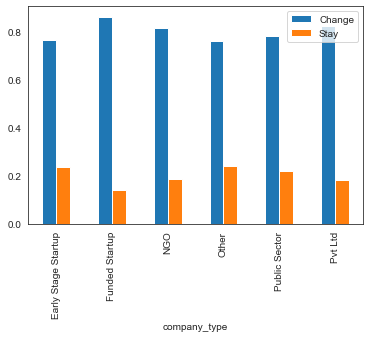

In [59]:
D.groupby("gender").agg("mean")[["Change","Stay"]].plot(kind='bar')
D.groupby("major_discipline").agg("mean")[["Change","Stay"]].plot(kind='bar')
D.groupby("company_type").agg("mean")[["Change","Stay"]].plot(kind='bar')

In [60]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
Df=pd.DataFrame()
D['gender'] = imputer.fit_transform(D['gender'].values.reshape(-1,1))[:,0]
D['major_discipline'] = imputer.fit_transform(D['major_discipline'].values.reshape(-1,1))[:,0]
D['company_type'] = imputer.fit_transform(D['company_type'].values.reshape(-1,1))[:,0]
Df=pd.concat([Df, D['gender']],axis=1)
Df=pd.concat([Df, D['major_discipline']],axis=1)
Df=pd.concat([Df, D['company_type']],axis=1)
Mf=Df.columns.values
Df=pd.DataFrame(Df,columns=Mf)
D.drop(['gender', 'major_discipline','company_type'], axis='columns', inplace=True)
D=pd.concat([D,Df],axis=1)

In [61]:
D

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Stay,Change,target,gender,major_discipline,company_type
0,103,0.920,1.0,0.0,2.0,22.0,NaN,1.0,36,1,0,1.0,Male,STEM,Pvt Ltd
1,40,0.776,0.0,0.0,2.0,15.0,74.0,5.0,47,0,1,0.0,Male,STEM,Pvt Ltd
2,21,0.624,0.0,1.0,2.0,5.0,NaN,0.0,83,0,1,0.0,Male,STEM,Pvt Ltd
3,115,0.789,0.0,0.0,2.0,0.0,NaN,0.0,52,1,0,1.0,Male,Business Degree,Pvt Ltd
4,162,0.767,1.0,0.0,3.0,22.0,74.0,4.0,8,0,1,0.0,Male,STEM,Funded Startup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,0.0,0.0,2.0,14.0,NaN,1.0,42,1,0,1.0,Male,Humanities,Pvt Ltd
19154,103,0.920,1.0,0.0,2.0,14.0,NaN,4.0,52,1,0,1.0,Male,STEM,Pvt Ltd
19155,103,0.920,1.0,0.0,2.0,22.0,74.0,4.0,44,0,1,0.0,Male,STEM,Pvt Ltd
19156,65,0.802,1.0,0.0,1.0,0.0,749.0,2.0,97,0,1,0.0,Male,STEM,Pvt Ltd


-----------Experience / Company size ---------------

<AxesSubplot:xlabel='company_size'>

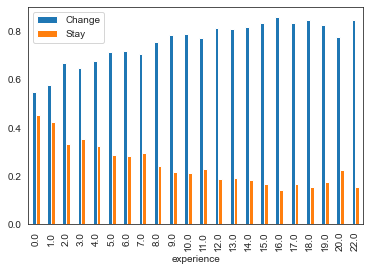

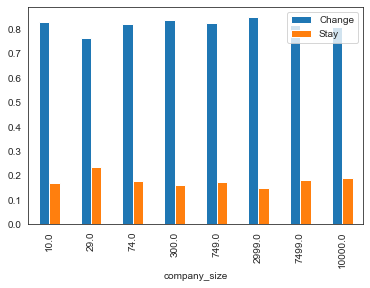

In [62]:
D.groupby("experience").agg("mean")[["Change","Stay"]].plot(kind='bar')
D.groupby("company_size").agg("mean")[["Change","Stay"]].plot(kind='bar')


In [63]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
Df=pd.DataFrame()
D.experience = imputer.fit_transform(D['experience'].values.reshape(-1,1))[:,0]
D['experience']=D.experience
D.company_size = imputer.fit_transform(D['company_size'].values.reshape(-1,1))[:,0]
D['company_size']=D.company_size


-----------last_new_job --------------

Interpolation–Linear :
A straight line is used to join dots in increasing order to approximate a missing value.

For the most part, the unknown value is calculated in the same ascending order as the previous values. We don’t have to specify Linear Interpolation because it is the default method.

<AxesSubplot:xlabel='last_new_job'>

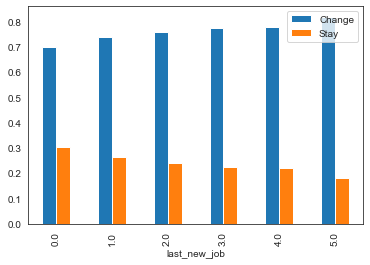

In [64]:
D.groupby("last_new_job").agg("mean")[["Change","Stay"]].plot(kind='bar')

In [65]:
D['last_new_job'] = D['last_new_job'].interpolate(method='linear', limit_direction='forward', axis=0)

In [66]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int32  
 1   city_development_index  19158 non-null  float64
 2   relevent_experience     19158 non-null  float64
 3   enrolled_university     19158 non-null  float64
 4   education_level         19158 non-null  float64
 5   experience              19158 non-null  float64
 6   company_size            19158 non-null  float64
 7   last_new_job            19158 non-null  float64
 8   training_hours          19158 non-null  int32  
 9   Stay                    19158 non-null  int32  
 10  Change                  19158 non-null  int32  
 11  target                  19158 non-null  float64
 12  gender                  19158 non-null  object 
 13  major_discipline        19158 non-null  object 
 14  company_type            19158 non-null  obj

In [67]:
""""df_2 = D.groupby('company_type').sum()
df_2.reset_index(inplace=True)
sns.barplot(x='company_type', y='Stay', data=df_2)
df_2 = D.groupby('company_type').sum()
df_2.reset_index(inplace=True)
sns.barplot(x='company_type', y='Change', data=df_2)"""
"""On remarque que Company size type n'a aucun effet au niveau du changement de travail : elle n'ajoute rien car presque on a les memes valeurs au niveau de la company size avec Stay et Change donc on peut la supprimer."""

"On remarque que Company size type n'a aucun effet au niveau du changement de travail : elle n'ajoute rien car presque on a les memes valeurs au niveau de la company size avec Stay et Change donc on peut la supprimer."

In [68]:
D = pd.get_dummies(D)
D=D.drop(columns=[])

In [69]:
check_for_nan = D.isna().sum()
print('---------Data ---------')
print (check_for_nan)

---------Data ---------
city                                0
city_development_index              0
relevent_experience                 0
enrolled_university                 0
education_level                     0
experience                          0
company_size                        0
last_new_job                        0
training_hours                      0
Stay                                0
Change                              0
target                              0
gender_Female                       0
gender_Male                         0
gender_Other                        0
major_discipline_Arts               0
major_discipline_Business Degree    0
major_discipline_Humanities         0
major_discipline_No Major           0
major_discipline_Other              0
major_discipline_STEM               0
company_type_Early Stage Startup    0
company_type_Funded Startup         0
company_type_NGO                    0
company_type_Other                  0
company_type_Public Sector

In [70]:
del(D['Stay'])
del(D['Change'])

# Machine Learning models

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [147]:
y=D['target']
X = D.drop(['target'], axis=1)

### Sans smote

In [ ]:
# standardisation des données

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline=[]
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())


 -------Model Evaluation------

In [75]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_list = ['Logistic Regression', 'SVM','KNN','Decision Tree','Random forest','Naive Bayes']
hyper =  [{},{},{}]
cm_list = []

for model in model_pipeline:
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    cm_list.append(confusion_matrix(y_test,y_pred))
    print('Modèle',model)
    print(classification_report(y_test,y_pred))
    

Modèle LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2877
         1.0       0.57      0.26      0.36       955

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.74      0.77      0.73      3832

Modèle SVC()
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      2877
         1.0       0.57      0.32      0.41       955

    accuracy                           0.77      3832
   macro avg       0.69      0.62      0.63      3832
weighted avg       0.74      0.77      0.75      3832

Modèle KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      2877
         1.0       0.48      0.37      0.42       955

    accuracy                           0.74      3832
   macro avg       0.65      0.62      

On a utliser les métriques suivantes : accuracy, ROC & AUC and confusion matrix

1) Accuracy : mesure le pourcentage de prédictions exactes (vp + vn) / (vp+ fp+fn + fp)

2) ROC : est le graphique du taux de vrais positifs par rapport au taux de faux positifs à différents seuils de classification. AUC :est la zone sous la courbe ROC, et une AUC plus élevée indique une meilleure performance du modèle.

3)Recall : permet de savoir le pourcentage de positifs bien prédit par notre modèle. (RQ :Plus le recall est haut, plus le modèle repère de positif)

4)Precision : permet de connaître le nombre de prédictions positifs bien effectuées (RQ:Plus elle est élevé, plus le modèle de Machine Learning minimise le nombre de Faux Positif)

=>Avec le recall, on regarde le nombre de positif que le modèle a bien prédit sur l’ensemble des positifs.Alors qu’avec la precision, on regarde le nombre de positif que le modèle a bien prédit sur l’ensemble des positifs prédit.

5)F1 Score : permet d’effectuer une bonne évaluation de la performance de notre modèle (RQ :le plus votre F1 Score est élevé, le plus votre modèle est performant)

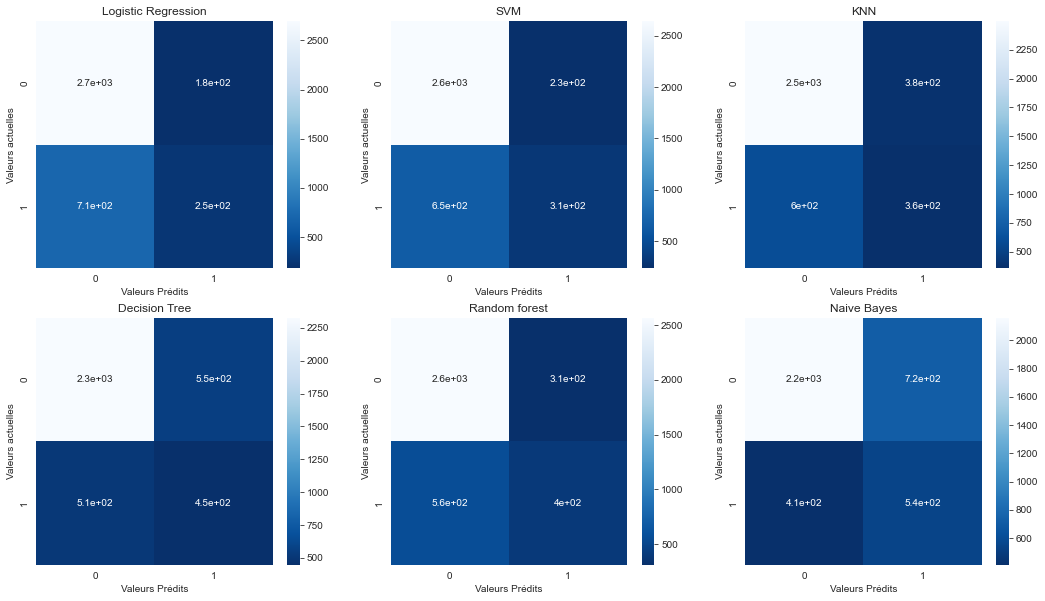

In [76]:
fig=plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm=cm_list[i]
    model=model_list[i]
    sub=fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot=sns.heatmap(cm,annot=True,cmap='Blues_r')
    cm_plot.set_xlabel('Valeurs Prédits')
    cm_plot.set_ylabel('Valeurs actuelles')


### Avec Smote

In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_resample(X, y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_sm, y_sm, test_size = 0.3,shuffle = True)
scaler = StandardScaler()
scaled_X_train_smote= scaler.fit_transform(X_train_smote)
scaled_X_test_smote= scaler.transform(X_test_smote)

In [78]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_list = ['Logistic Regression', 'SVM','KNN','Decision Tree','Random forest','Naive Bayes']
hyper =  [{},{},{}]
cm_list_smote = []

for model in model_pipeline:
    model.fit(scaled_X_train_smote, y_train_smote)
    y_pred_smote = model.predict(scaled_X_test_smote)
    cm_list_smote.append(confusion_matrix(y_test_smote,y_pred_smote))
    print('Modèle',model)
    print(classification_report(y_test_smote,y_pred_smote))
    

Modèle LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76      4251
         1.0       0.79      0.69      0.73      4378

    accuracy                           0.75      8629
   macro avg       0.75      0.75      0.75      8629
weighted avg       0.75      0.75      0.75      8629

Modèle SVC()
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80      4251
         1.0       0.83      0.75      0.79      4378

    accuracy                           0.79      8629
   macro avg       0.80      0.79      0.79      8629
weighted avg       0.80      0.79      0.79      8629

Modèle KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      4251
         1.0       0.79      0.80      0.79      4378

    accuracy                           0.79      8629
   macro avg       0.79      0.79      

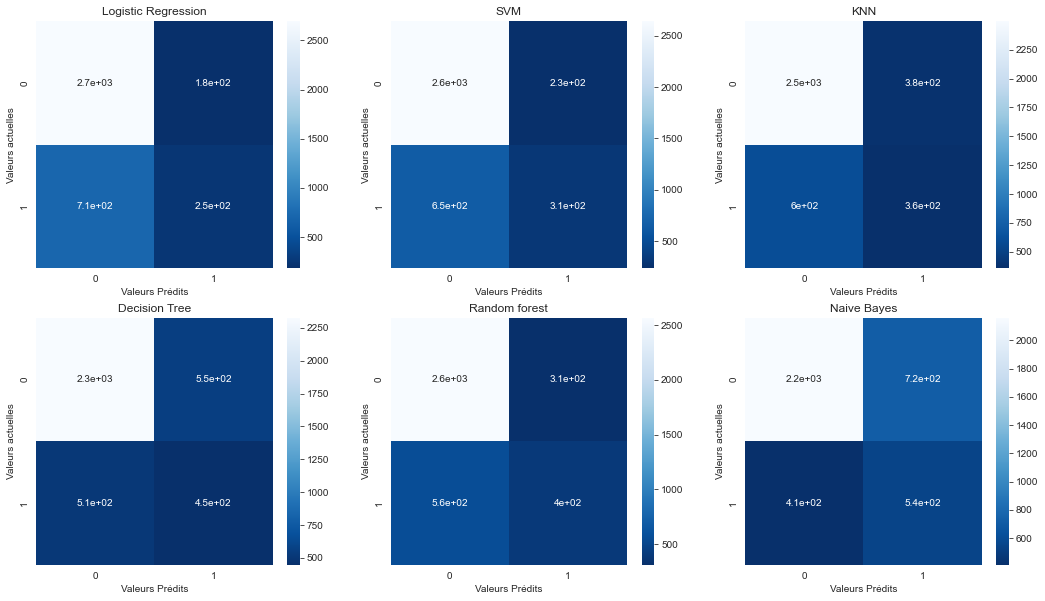

In [79]:
fig=plt.figure(figsize=(18,10))
for i in range(len(cm_list_smote)):
    cm=cm_list[i]
    model=model_list[i]
    sub=fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot=sns.heatmap(cm,annot=True,cmap='Blues_r')
    cm_plot.set_xlabel('Valeurs Prédits')
    cm_plot.set_ylabel('Valeurs actuelles')


==> On peut remarquer que le meilleure modele est Random Forest car c'est le modele qui donne le plus d'accuarcy qui est égal a 0.85 donc on va faire le Grid Search sur ce modele afin d'essayer de rendre le modele plus performant 

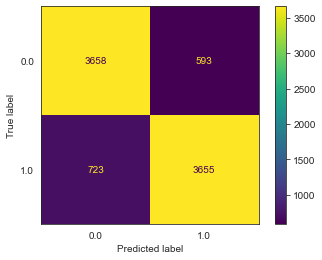

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
rf = RandomForestClassifier()
rf.fit(scaled_X_train_smote, y_train_smote);
ConfusionMatrixDisplay.from_estimator(rf,scaled_X_test_smote,y_test_smote)

In [81]:
from sklearn.metrics import accuracy_score
y_pred_rf = rf.predict(scaled_X_test_smote)
accuracy_score(y_test_smote,y_pred_rf)

0.8474910186580137

In [82]:
print(classification_report(y_test_smote,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      4251
         1.0       0.86      0.83      0.85      4378

    accuracy                           0.85      8629
   macro avg       0.85      0.85      0.85      8629
weighted avg       0.85      0.85      0.85      8629



In [88]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'n_estimators' : [1300,1500,1800],
    'max_features': ['auto', 'sqrt', 'log2',None],
    'min_samples_leaf' : [3,4,5,6],
    'min_samples_split' : [2,4,5],
    'max_depth' : [4,5,6],
   'criterion' : ['gini', 'entropy'],}
grid_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(scaled_X_train_smote, y_train_smote)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [2, 4, 5],
                                        'n_estimators': [1300, 1500, 1800]})

In [89]:
grid_search_rf.best_params_

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'gini'}

In [90]:
rf = RandomForestClassifier(n_estimators=600,max_depth=100)
rf.fit(scaled_X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=100, n_estimators=600)

In [91]:
y_pred_rf = rf.predict(scaled_X_test)
accuracy_score(y_test,y_pred_rf)

0.27218162839248433

In [92]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.03      0.06      2877
         1.0       0.25      1.00      0.41       955

    accuracy                           0.27      3832
   macro avg       0.61      0.51      0.23      3832
weighted avg       0.78      0.27      0.15      3832

